![image.png](plots/portada_svm_2.png)

# Introducción
___
¡Bienvenidos a las prácticas de __máquinas de vector soporte__ (o support vector machines)! Las SVM son una de las herramientas más versátiles en Machine Learning, capaces de resolver problemas de __clasificación__ lineal, no lineal, __regresión__ e incluso de __detección de outliers__. Las SVM resultan especialmente útiles cuando se trabaja con __conjuntos de datos complejos__ (con muchas variables) y __de tamaño medio__ (no muchas observaciones), en problemas de clasificación, ya que tienen una gran capacidad de generalización.

Como bibliografía adicional para estas sesiones recomiendo:
* [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/). Capítulos 3 y 5.
* [Learning: Support Vector Machines (MIT OpenCourseWare)](https://www.youtube.com/watch?v=_PwhiWxHK8o&t=1s) hace una muy buena introducción teórica de las SVM.

Para resolver estas prácticas necesitaremos los paquetes de Python de `numpy`, `pandas`, `matplotlib` y `sklearn`, empecemos cargando estos paquetes:

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(5) # Los resultados del notebook serán los mismos en cada ejecución

# SVM lineal
___

$$
k(x_i, x_j) = x_i^tx_j
$$
## Margen duro

El caso más sencillo de SVM es el lineal. Dado un conjunto de puntos separables, que pertenecen a dos categorías, buscamos conseguir una función de decisión de forma que cuando recibamos un nuevo punto podamos asignar a qué categoría pertenece. Nuestra función de decisión será un hiperplano (en 2D es una recta, en 3D un plano, etc) tal que la distancia entre cada conjunto de puntos y el hiperplano sea la mayor posible.

Como la función de decisión es un plano, __las SVM se dice que son clasificadores lineales binarios__. Veamos un ejemplo:

In [2]:
# Creamos 100 puntos linealmente separables repartidos en dos categorías

X = np.concatenate((np.random.normal(loc=-2, scale=1, size=(30, 2)), np.random.normal(loc=2, scale=1, size=(30, 2))))
y = np.asarray([0] * 30 + [1] * 30)

In [3]:
# Entrenamos una SVM lineal de margen duro
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=float("inf"))  
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [4]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    """
    svm_clf: Clasificador SVM lineal 2D
    xmin: extremo inferior del eje x del hiperplano que queramos representar
    xmin: extremo superior del eje x del hiperplano que queramos representar
    Representa el hiperplano de una SVM lineal para datos 2D
    """
    w = svm_clf.coef_[0]                                            # Vector w normal al plano
    b = svm_clf.intercept_[0]                                       # valor b (intercepto)
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)                               # Mallado de puntos en eje horizontal
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]                    # Valor del hiperplano en el eje vertical 

    margin = 1/w[1]                                                 # Margen
    gutter_up = decision_boundary + margin                          # Margen superior
    gutter_down = decision_boundary - margin                        # Margen inferior

    svs = svm_clf.support_vectors_                                  # Vectores soporte
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')  # Pintar area alrededor de vectores soporte
    plt.plot(x0, decision_boundary, "k-", linewidth=2)              # Pintar hiperplano
    plt.plot(x0, gutter_up, "k--", linewidth=2)                     # Pintar margen superior
    plt.plot(x0, gutter_down, "k--", linewidth=2)                   # Pintar margen inferior

In [5]:
def scatter_plot_svm(X, y):
    """
    X: matriz de dimensiones [n_obs, 2]
    y: vector binario con valores 0 o 1
    Representación del scatterplot de las variables de X en base a las categorías de y
    """
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")    # Pintar con triangulos verdes los puntos de la categoría 1
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")    # Pintar con cuadrados azules los puntos de la categoría 0
    plt.grid(True, which='both')                    # Pintar malla en los ejes

(-5.0, 5.0, -5.0, 6.0)

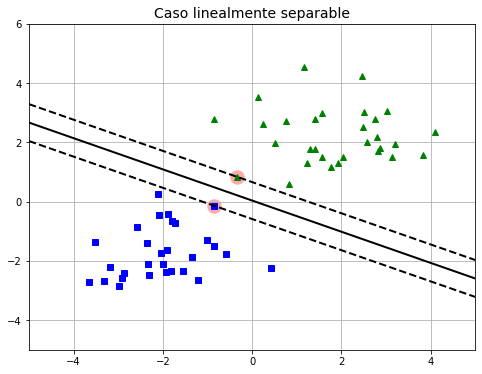

In [6]:
plt.figure(figsize=(8, 6))

scatter_plot_svm(X, y)
plot_svc_decision_boundary(svm_clf, -5, 5)

plt.title("Caso linealmente separable", fontsize=14)
plt.axis([-5, 5, -5, 6])

## Efecto de la escala

### <font color='D12828'> Ejercicio: </font>

1. ¿Crees que  la escala de los datos afecta al resultado de una SVM? (responde intuitivamente). Lo comprobamos en los siguientes pasos:
2. Generaremos un conjunto de datos. Entrena una SVM como la anterior en este conjunto de datos.
3. Escala los datos y entrena otra SVM con los datos escalados.
4. Representa gráficamente ambas SVM's usando las funciones `plot_svc_decision_boundary(svm_clf, xmin, xmax)` y `scatter_plot_svm(X, y)`

(0.0, 6.0, 0.0, 90.0)

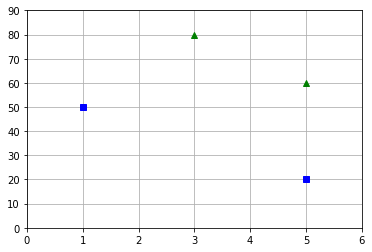

In [7]:
Xs = np.array([[1, 50], 
               [5, 20], 
               [3, 80], 
               [5, 60]]).astype(np.float64)

ys = np.array([0, 0, 1, 1])

scatter_plot_svm(Xs, ys)
plt.axis([0, 6, 0, 90])

(-3.0, 3.0, -3.0, 3.0)

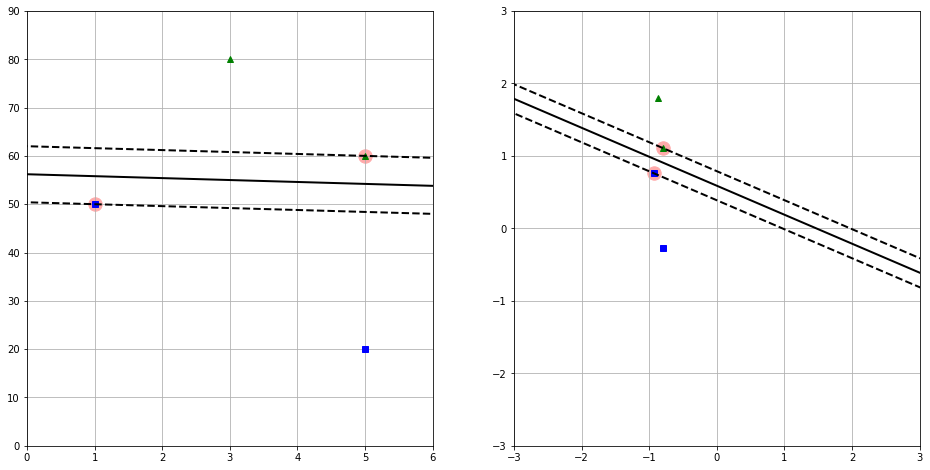

In [12]:
# Ejercicio
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)

# Datos no escalados

svm_1 = SVC(kernel='linear', C=float("inf"))
svm_1.fit(Xs, ys)

scatter_plot_svm(Xs, ys)
plot_svc_decision_boundary(svm_1, -6, 6)
plt.axis([0, 6, 0, 90])

# escalados
plt.subplot(1, 2, 2)
Xs_escalado = (Xs - np.mean(Xs)) / np.std(Xs)
svm_2 = SVC(kernel='linear', C=float("inf"))
svm_2.fit(Xs_escalado, ys)

scatter_plot_svm(Xs_escalado, ys)
plot_svc_decision_boundary(svm_2, -6, 6)
plt.axis([-3, 3, -3, 3])

## Margen blanco

Si imponemos que todos los puntos del conjunto deban estar fuera del margen, tenemos lo que se llama un __margen duro__. Esta idea, que es la que hemos trabajado hasta ahora, presenta dos problemas:

* ¿Qué ocurre si los datos no son separables? En este caso es imposible construir un hiperplano como el que buscamos
* Los outlers pueden afectar mucho al hiperplano construido, haciendo que no se generalice bien.

Para solventar ambos problemas surge la idea del __margen blando__, que busca un equilibrio entre el mayor margen posible, permitiendo que algunos de los puntos no estén correctamente clasificados. Cómo de blando es el margen se controla con un hyperparámetro llamado "coste"  `C`.

* Cuanto mayor es el coste, más se penaliza la presencia de observaciones mal clasificadas, es decir, más duro es el margen
* Cuanto menor es el coste, menos se penaliza la presencia de observaciones mal clasificadas, es decir, mas blando es el margen

### <font color='D12828'> Ejercicio: </font>
Veamos el efecto del hiperparámetro del coste. Utilizando el conjunto de datos del inicio, añadiremos un outlier.
1. Entrena una SVM que tenga coste 0.01 en este conjunto de datos, y representa el hiperplano usando las funciones `plot_svc_decision_boundary(svm_clf, xmin, xmax)` y `scatter_plot_svm(X, y)`
2. Entrena otra SVM que tenga coste 1000 y representa su hiperplano

In [13]:
# Añadimos un outlier en la categoría 0
Xo = np.concatenate((X, np.array([[-0.1, 2.5]])))
yo = np.concatenate((y, [0]))

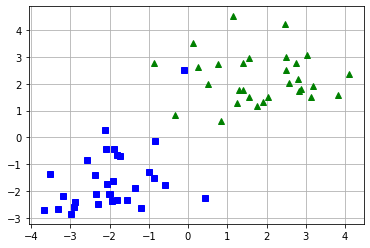

In [14]:
scatter_plot_svm(Xo, yo)

(-5.0, 5.0, -5.0, 5.0)

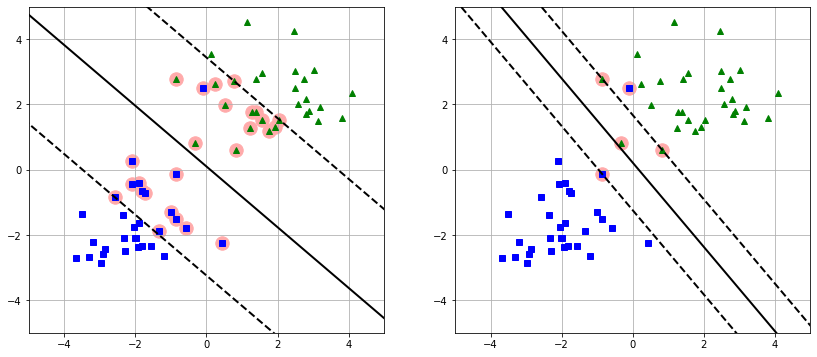

In [16]:
# Ejercicio

plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)

svm1 = SVC(kernel='linear', C=0.01)
svm1.fit(Xo, yo)

scatter_plot_svm(Xo, yo)
plot_svc_decision_boundary(svm1, -6, 6)
plt.axis([-5, 5, -5, 5])


plt.subplot(1,2,2)

svm1 = SVC(kernel='linear', C=1000)
svm1.fit(Xo, yo)

scatter_plot_svm(Xo, yo)
plot_svc_decision_boundary(svm1, -6, 6)
plt.axis([-5, 5, -5, 5])

# SVM polinómica
___

Muchas veces se trabaja con conjuntos de datos que simplemente no son linealmente separables. En esas situaciones puede ser interesante añadir variables extra calculadas en base a las originales, como por ejemplo, variables polinómicas ($x^2, x^3,\ldots,x^p$), ya que al añadir estas variables, puede que se consiga un conjunto de datos separable. Veamos un ejemplo en 1D:

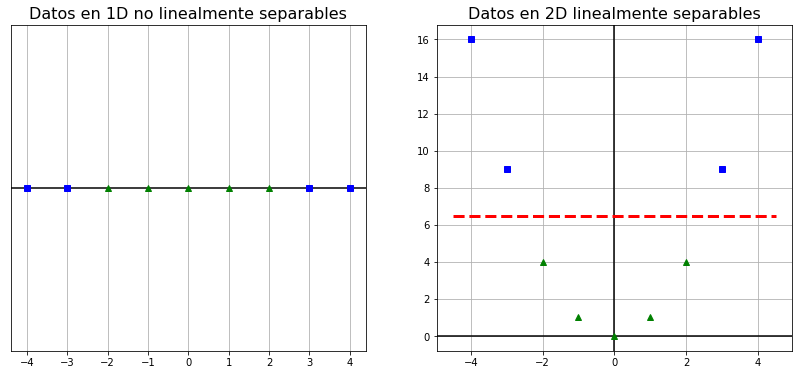

In [17]:
# Generamos conjunto de 9 puntos en 1D
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.concatenate((X1D, X1D**2), axis=1)
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

# Generamos figura
plt.figure(figsize=(14, 6))

# Gráfica 1D #####################################
plt.subplot(1, 2, 1)
plt.title('Datos en 1D no linealmente separables', fontsize=16)
plt.grid(True, which='both')     # Añadimos mallado
plt.axhline(y=0, color='black')  # Añadimos linea horizontal

plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")  # scatterplot
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")  # scatterplot

plt.gca().get_yaxis().set_ticks([])  # Quitar ticks del eje vertical

# Gráfica 2D #####################################
plt.subplot(1, 2, 2)
plt.title('Datos en 2D linealmente separables', fontsize=16)
plt.grid(True, which='both')     # Añadimos mallado
plt.axhline(y=0, color='black')  # Añadimos linea horizontal
plt.axvline(x=0, color='black')  # Añadimos linea vertical

scatter_plot_svm(X2D, y)  # scatterplot

plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)

## Kernel polinómico
En el ejemplo de antes solo hemos necesitado añadir una variable, pero si tuviesemos, por ejemplo, 15 variables iniciales, y quisiesemos considerar, por ejemplo, polinómios de grado 7, eso implicaría tener que incluir en el dataset 7 variables por cada una de las originales, es decir, 105 variables en total, aumentando en gran medida la complejidad del problema. Es aquí donde entra en juego el __kernel trick__, una idea clave de las SVM.

El kernel trick nos permite obtener los mismos resultados que si hubiesemos añadido todas estas variables polinómicas, sin necesidad de calcular esas variables. Solo necesitamos conocer la función kernel asociada, que está ya implementada en sklearn.

$$K(x_i,x_j) = (\gamma x_i^tx_j+c_0)^p  $$

### Añadiendo las variables polinómicas
Veamos un ejemplo utilizando polinomios de grado 3 en el conjunto 2D de datos `moons`. Primero haremos el proceso que tendríamos que seguir si no usasemos el kernel trick y añadiesemos al dataset todas las variables necesarias para polinomios de grado 3:

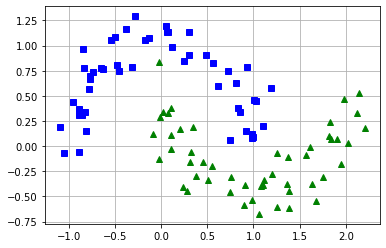

In [18]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)  # Generamos conjunto de datos

scatter_plot_svm(X, y)

In [19]:
# Generar variables polinómicas
poly_vars = PolynomialFeatures(degree=3)
X_updated = poly_vars.fit_transform(X)
print(f'X_updated shape: {X_updated.shape}')

# Escalar los datos
scaler = StandardScaler()
X_updated = scaler.fit_transform(X_updated)

# Obtener SVM
svm_clf = SVC(kernel="linear", C=10)
svm_clf.fit(X_updated, y)

X_updated shape: (100, 10)


SVC(C=10, kernel='linear')

#### Pipelines

En muchas situaciones puede sernos util utilizar `Pipelines`. Un pipeline es una secuencia de comandos que se aplican sobre los datos en el orden en el que son establecidos. Cada paso del pipeline debe ser un  transformer, es decir, debe incluir el method `transform`. Ejemplos de transformers son la función `StandardScaler` que nos permite estandarizar los datos, o `PolynomialFeatures`, que genera las variables polinómicas. El último elemento del pipeline es un estimador. Algo que incluya el method `fit`, como en este caso, una svm. El resultado de todo este proceso se almacena en `polynomial_svm_clf`.

In [20]:
from sklearn.pipeline import Pipeline

# El mismo proceso de antes usando un pipeline

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=10))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()), ('svm_clf', SVC(C=10))])

Al añadir las variables polinómicas, la SVM ha dejado de representarse como un plano en el espacio de origen, por lo que definimos una nueva función para representar el hiperplano separador:

In [21]:
def plot_predictions(svm_clf, axes):
    """
    svm_clf: Pipeline con una SVM final
    axes: ejes en los que representar el hiperplano
    Función que representa gráficamente el hiperplano separador generado por la svm
    """
    x0s = np.linspace(axes[0], axes[1], 100)                      # Generamos puntos en eje horizontal
    x1s = np.linspace(axes[2], axes[3], 100)                      # Generamos puntos en eje vertical
    x0, x1 = np.meshgrid(x0s, x1s)                                # Hacemos mallado de puntos
    X = np.c_[x0.ravel(), x1.ravel()]                             # Matriz que contiene 2 columnas, con cada par de valores 
    y_pred = svm_clf.predict(X).reshape(x0.shape)                 # Predicciones de la svm
    y_decision = svm_clf.decision_function(X).reshape(x0.shape)   # Valor de la función de decisión
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)      # Añadimos contorno en base a las predicciones
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)  # Añadimos lineas de nivel en base al valor de la función de decisión (hiperplano)
 

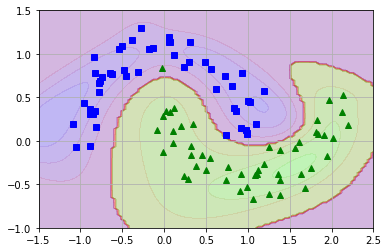

In [22]:
scatter_plot_svm(X, y)
plot_predictions(svm_clf=polynomial_svm_clf, axes=[-1.5, 2.5, -1, 1.5])

### Usando un kernel polinómico
Llegamos a un resultado similar si, en vez de generar las variables polinómicas y añadirlas a la base de datos, simplemente usamos el kernel polinómico de grado 3: `SVC(kernel='poly')`

Esta función tiene algunos parámetros adicionales:
* `C`: Parámetro de coste. Tiene la misma interpretación que en el caso lineal.
* `degree`: Grado de los polinomios a considerar
* `coef0`: $c_0$. Parámetro adicional relacionado con la importancia de cada grado de los polinómios. Útil en los casos en que p es muy elevado.
* `gamma`: $\gamma$ Parámetro adicional, factor multiplicativo del kernel.

In [23]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

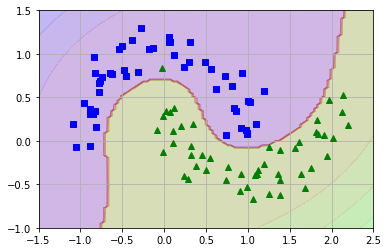

In [24]:
scatter_plot_svm(X, y)
plot_predictions(svm_clf=poly_kernel_svm_clf, axes=[-1.5, 2.5, -1, 1.5])

### <font color='D12828'> Ejercicio: </font>
Veamos el efecto del hiperparámetro del coste. En el mismo conjunto de datos de antes, construye un pipeline que:
1. Estandarice el conjunto de datos
2. Calcule una SVM con kernel polinómico de grado 4, y `coef0=1`. Prueba el valor del coste `C=1e-3` y el valor del coste `C=1e3` en la SVM anterior.
3. ¿Qué diferencias ves entre ambos?


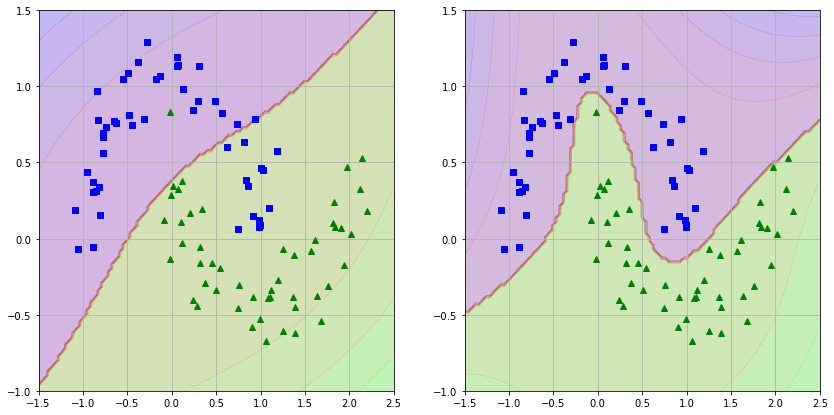

In [25]:
# Ejercicio

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=4, coef0=1, C=1e-3))
    ])
poly_kernel_svm_clf.fit(X, y)

scatter_plot_svm(X, y)
plot_predictions(svm_clf=poly_kernel_svm_clf, axes=[-1.5, 2.5, -1, 1.5])

plt.subplot(1,2,2)

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=4, coef0=1, C=1e3))
    ])
poly_kernel_svm_clf.fit(X, y)

scatter_plot_svm(X, y)
plot_predictions(svm_clf=poly_kernel_svm_clf, axes=[-1.5, 2.5, -1, 1.5])

# SVM Gausiana
___

Acabamos de ver los beneficios de incluir variables polinómicas, y cómo esto es equivalente a utilizar un kernel polinómico. Otra herramienta muy utilizada es la de las __medidas de similaridad__, que miden cómo de similares son una observación del conjunto de datos, y un punto de referencia en el espacio (landmark). La más utilizada de estas medidas es la __Radial basis function__ gausiana (RBF), que se define como:

$$
\phi(x, l) = exp(-\gamma\|x-l\|^2)
$$

Esta función tiene forma de campana, como la distribución gausiana, y toma valor 0 para puntos muy alejados del landmark, y valor 1 para puntos muy cercanos. 

(-0.1, 1.1, -0.1, 1.1)

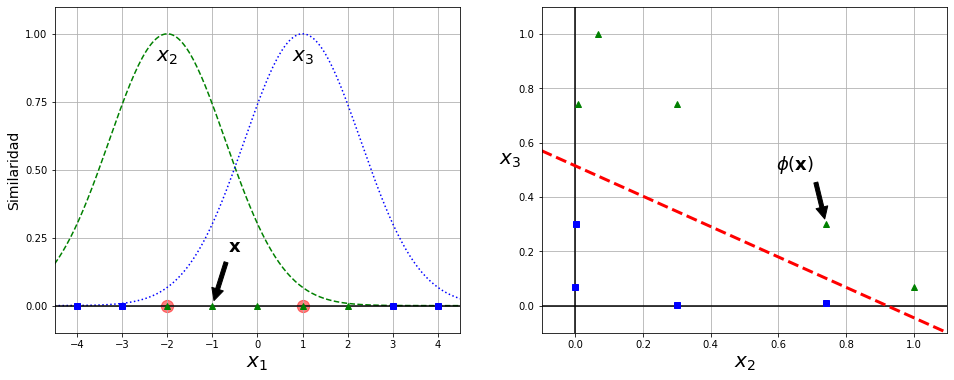

In [26]:
# Definimos la función gausiana
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

# Calculamos y representamos las curvas de las campanas X2 y X3
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# Calculamos el valor de la función gausiana en los puntos X1D
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

# GRAFICA 1D ####################################################################

plt.figure(figsize=(16, 6))                                   # Generamos figura

plt.subplot(1, 2, 1)                                          # Generamos subplot
plt.plot(x1s, x2s, "g--")                                     # Representamos curva de X2
plt.plot(x1s, x3s, "b:")                                      # Representamos curva de X3

plt.grid(True, which='both')                                  # Añadimos grid
plt.axhline(y=0, color='k')                                   # Añadimos linea horizontal en y=0

plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")   # Marcamos posición de los landmark
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")                 # Representamos puntos del conjunto 1D
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")                 # Representamos puntos del conjunto 1D

plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])      # Eliminamos ticks del eje y
plt.xlabel("$x_1$", fontsize=20)                              # Etiqueta eje horizontal
plt.ylabel("Similaridad", fontsize=14)                        # Etiqueta eje vertical
plt.annotate(r'$\mathbf{x}$',                                 # Marcar posición de un punto x
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18)

plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)         # Marcar distribución de similaridad x2
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)          # Marcar distribución de similaridad x3
plt.axis([-4.5, 4.5, -0.1, 1.1])

# GRAFICA 2D ####################################################################

plt.subplot(1, 2, 2)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")

plt.xlabel("$x_2$", fontsize=20)
plt.ylabel("$x_3$  ", fontsize=20, rotation=0)

plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )

plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

La imagen de la izquierda muestra el conjunto de datos 1-dimensional que planteamos con la SVM polinómica. En este conjunto tomamos dos puntos, sombreados en rojo, como landmarks, y calculamos la similaridad entre cada punto y el landmark. Por ejemplo, el punto $x$ toma el valor -1, veamos qué valor tiene en función de los dos landmakr:
* Está a una distancia de 1 del primer landmark, por lo que $x2=exp(-0.3\times1^2)=0.74$
* Está a una distancia de 2 del segundo landmark, por lo que $x3=exp(-0.3\times2^2)=0.3$

Si repetimos este proceso con cada punto, estaremos proyectando el conjunto de datos 1D en un espacio con 2 dimensiones (imagen de la derecha) en la que los puntos son separables. 

Aquí hemos usado dos landmarks, aunque en la práctica es considerar cada observación como un landmark, por lo que si se tienen n observaciones, se proyectarán en un espacio de n dimensiones. Este es el proceso que el kernel rbf gausiano lleva a cabo, pero sin necesidad de calcular las nuevas variables, ni de proyectarlas en el nuevo espacio, sino simplemente empleando la función kernel asociada,

## Kernel gausiano

$$ K(x_i, x_j)=exp(-\gamma\|x_i-x_j\|^2) $$

este kernel construirá una frontera no lineal a base de circulos (campanas como las de la distribución normal) centrados en los vectores soporte. Tiene dos parámetros:

* `C`: parámetro de coste ya comentado anteriormente;
* $\gamma$: `gamma` este parámetro es el inverso al $\sigma$ en una distribución normal. A mayor $\gamma$, menor $\sigma$, es decir, los circulos en torno a los vectores soporte serán más pequeños, y el modelo será menos general.

Veamos un ejemplo de este kernel en el dataset de moons:

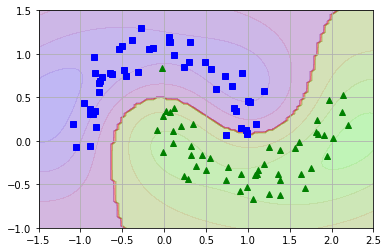

In [27]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf"))
])

rbf_kernel_svm_clf.fit(X, y)

scatter_plot_svm(X, y)
plot_predictions(svm_clf=rbf_kernel_svm_clf, axes=[-1.5, 2.5, -1, 1.5])

### <font color='D12828'> Ejercicio: </font>
En el conjunto de datos anterior, prueba a calcular las siguientes SVMs utilizando el kernel RBF

1. `gamma=0.1` y `C=0.001`
2. `gamma=0.1` y `C=1000`
3. `gamma=5` y `C=0.001`
4. `gamma=5` y `C=1000`
5. ¿Qué interpretación haces del efecto de los parámetros?

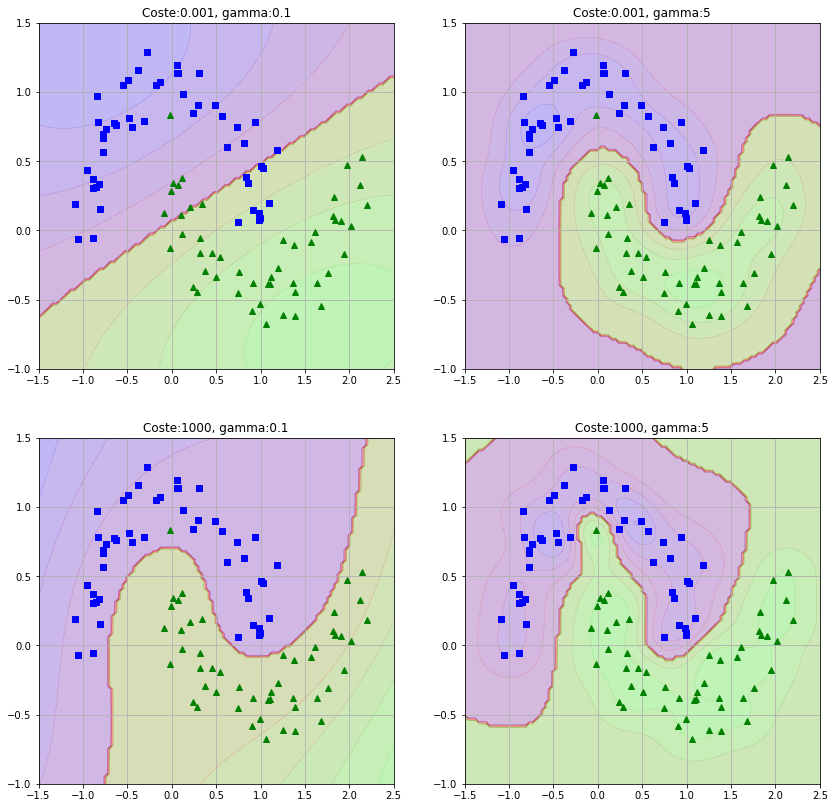

In [31]:
# Ejercicio

gamma = [0.1, 5]
coste = [0.001, 1000]

parametro = [(c,g) for c in coste for g in gamma]

plt.figure(figsize = (14, 14))
idx = 1
for c,g in parametro:
    plt.subplot(2, 2, idx)
    rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=g, C=c))
    ])
    rbf_kernel_svm_clf.fit(X, y)

    scatter_plot_svm(X, y)
    plot_predictions(svm_clf=rbf_kernel_svm_clf, axes=[-1.5, 2.5, -1, 1.5])
    plt.title(f'Coste:{c}, gamma:{g}')
    idx = idx + 1

In [29]:
parametro

[(0.001, 0.1), (0.001, 5), (1000, 0.1), (1000, 5)]

# Final
___
Con esto termina nuestra introducción en el mundo de las máquinas de vector soporte. A continuación estudiaremos cómo analizar un conjunto de datos de un problema real: reconocer imágenes de dígitos escritos a mano usando una SVM.

![image.png](plots/fin_svm_2.png)